# Exploring und Plotting 2

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Börsenkurse aller Bluechips-Firmen an der Schweizer Börse.

Korpus: https://www.six-group.com/exchanges/shares/explorer/swiss_blue_chips/closings_de.html

Die Daten stammen von dieser Quelle: https://finance.yahoo.com/ und wurden zu einem File kompiliert.

Kompilierungsfile: `dataprojects/Boersenkurse/Börsenkurse kompilieren.ipnyb`

Kompilierte Daten: `dataprojects/Boersenkurse/smi_members.csv`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

**Tipp:** `index_col=0` verwenden.

In [60]:
df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv', index_col=0)

In [61]:
df.head()

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-13,19.65,60.400002,NaN,NaN,15.54,23.689699,289.799988,1461.0,39.500000,117.300003,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.5,32.000000,15.30,74.449997,279.000000
2014-10-14,19.76,60.700001,NaN,NaN,15.58,23.689699,294.399994,1478.0,39.770000,118.400002,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.0,32.500000,15.33,75.000000,277.600006
2014-10-15,19.16,58.849998,NaN,NaN,15.16,22.817499,288.000000,1458.0,37.459999,115.900002,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.5,32.200001,14.73,73.900002,270.399994
2014-10-16,19.26,59.500000,NaN,NaN,15.06,22.292299,288.000000,1466.0,37.509998,117.099998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.5,31.650000,14.50,72.849998,265.899994
2014-10-17,19.40,60.950001,NaN,NaN,15.38,22.751900,297.200012,1494.0,39.119999,117.500000,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.5,32.500000,15.05,75.849998,271.899994


## Daten checken

**Länge, Spalten, Integrität**

In [62]:
df.shape

(1255, 30)

In [63]:
df.dtypes

ABB LTD               float64
ADECCO                float64
ALCON                 float64
AMS                   float64
CLARIANT              float64
CS GROUP              float64
GEBERIT               float64
GIVAUDAN              float64
JULIUS BAER           float64
KUEHNE+NAGEL INT      float64
LAFARGEHOLCIM         float64
LOGITECH              float64
LONZA                 float64
NESTLE                float64
NOVARTIS              float64
PARTNERS GROUP        float64
RICHEMONT             float64
ROCHE                 float64
SCHINDLER             float64
SGS                   float64
SIKA                  float64
SONOVA                float64
SWATCH GROUP          float64
SWISS LIFE HOLDING    float64
SWISS RE              float64
SWISSCOM              float64
TEMENOS               float64
UBS GROUP             float64
VIFOR                 float64
ZURICH INSURANCE      float64
dtype: object

## Vorbereitung

Mit welchem Typ von Daten haben wir es hier zu tun? Was müssen wir für Eigenschaften des Dataframe modifizieren, um optimal damit arbeiten zu können?

**Tipp:** mit `df.index` können Sie auf die Index-Spalte zugreifen

In [64]:
# Wir müssen die Indexspalte als Datetime 
df.index = pd.to_datetime(df.index)

## Explorieren

Ihr Ziel ist, aus den Börsendaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Was sind mögliche interessante Fragen?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten!

**Beispiel 1:** Wertsteigerung der Firmen in den letzten fünf Jahren: 5 beste und 5 schlechteste

In [65]:
# Wir wählen die erste Zeile aus und dividieren sämtliche Zeilen durch sie

In [66]:
s_first = df.iloc[0]

In [67]:
df_indexed = ((df / s_first) - 1) * 100

In [68]:
# Die letzte Zeile gibt uns die gesamte Veränderung an

In [69]:
s_5y_chg = df_indexed.iloc[-1].sort_values(ascending=False)

In [70]:
# Beste 5 Firmen:

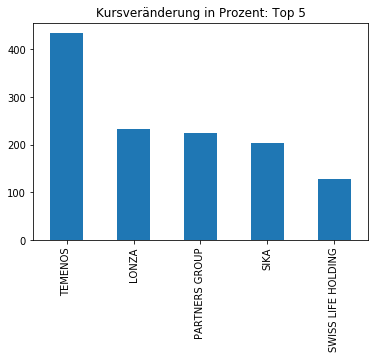

In [74]:
s_5y_chg.head(5).plot(kind='bar', title='Kursveränderung in Prozent: Top 5')

In [72]:
# Schlechteste 5 Firmen:

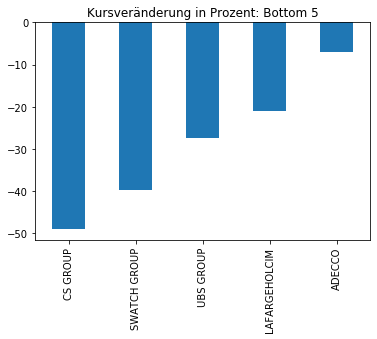

In [75]:
s_5y_chg.sort_values().head(5).plot(kind='bar', title='Kursveränderung in Prozent: Bottom 5')

**Beispiel 2:** Firmen, deren Jahresperformance 2019 (bis dato) gegenüber der Performance 2018 am meisten verbessert hat

In [104]:
# Jahresendkurse

In [105]:
df_end = df.resample('A').last()

In [106]:
df_end

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-12-31,21.139999,68.849998,NaN,NaN,16.719999,23.520901,338.399994,1793.0,45.810001,135.300003,...,48.933300,146.899994,444.200012,236.399994,83.650002,522.500000,35.500000,17.090000,79.199997,311.700012
2015-12-31,17.959999,68.900002,NaN,NaN,19.010000,20.929100,340.200012,1823.0,48.660000,137.800003,...,60.333302,127.300003,350.200012,271.299988,98.150002,503.000000,51.950001,19.520000,157.399994,258.399994
2016-12-31,21.480000,66.650002,NaN,NaN,17.570000,14.097500,408.200012,1866.0,45.230000,134.600006,...,81.533302,123.400002,316.700012,288.200012,96.500000,456.100006,70.900002,15.950000,114.900002,280.399994
2017-12-31,26.120001,74.550003,NaN,NaN,27.250000,17.400000,429.100006,2252.0,59.599998,172.500000,...,129.000000,152.199997,397.399994,345.000000,91.250000,518.500000,125.000000,17.940001,124.900002,296.600006
2018-12-31,18.695000,45.930000,NaN,NaN,18.090000,10.800000,382.299988,2276.0,35.009998,126.349998,...,124.599998,160.600006,286.700012,378.600006,90.120003,469.700012,117.900002,12.235000,106.900002,293.100006
2019-12-31,18.475000,56.139999,56.200001,44.259998,20.690001,12.055000,472.799988,2840.0,44.139999,151.800003,...,157.300003,227.500000,262.799988,482.100006,103.550003,506.000000,171.050003,11.105000,155.949997,388.799988


In [107]:
# Veränderungen 2019 resp 2018

In [120]:
s_2019 = (df_end.loc['2019-12-31'] / df_end.loc['2018-12-31'] - 1) * 100

In [121]:
s_2018 = (df_end.loc['2018-12-31'] / df_end.loc['2017-12-31'] - 1) * 100

In [122]:
# Differenz

In [123]:
s_chg_2018_19 = s_2019 - s_2018

In [124]:
s_chg_2018_19.sort_values(ascending=False)

JULIUS BAER           67.336658
ADECCO                60.619822
VIFOR                 60.295527
TEMENOS               50.760575
CS GROUP              49.551405
CLARIANT              47.987266
KUEHNE+NAGEL INT      46.896090
LAFARGEHOLCIM         43.555899
RICHEMONT             43.001532
PARTNERS GROUP        39.134148
NESTLE                38.582787
SONOVA                36.137224
GEBERIT               34.579062
ZURICH INSURANCE      33.831006
LONZA                 33.615665
SIKA                  29.654839
SCHINDLER             27.731798
ABB LTD               27.249711
SGS                   24.836322
GIVAUDAN              23.714597
UBS GROUP             22.564651
ROCHE                 20.115454
SWATCH GROUP          19.519812
SWISS LIFE HOLDING    17.598427
SWISSCOM              17.140097
SWISS RE              16.140705
NOVARTIS              14.700021
ALCON                       NaN
AMS                         NaN
LOGITECH                    NaN
dtype: float64

In [125]:
# Top 10 Verbesserungen

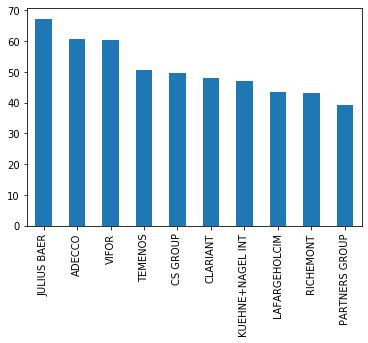

In [126]:
s_chg_2018_19.sort_values(ascending=False).head(10).plot(kind='bar')

## Die Story
Wählen Sie eine ihrer Fragen aus, die Sie bearbeitet haben.
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren